# Calculating Spectra directly from a Numpy Array

As an example we are going to creat some white noise to calculate the spectra from. Of course, we are expecting to see a flat powerspectum.

In [1]:
import SignalSnap as snp
import numpy as np
rng = np.random.default_rng()

In [2]:
# ------ Generation of white noise -----
unit = 'Hz'
fs = 10e3 # sampling rate
N = 1e5 # number of points
t = np.arange(N) / fs
y = rng.normal(scale=1, size=t.shape)
print(y)

[ 0.15258295  1.77327622  0.55237281 ... -0.74770894  1.34209661
 -0.60677379]


Now we creat a spectrum object and feed it with the data. This object will store the data, later the spectra and errors, all freely chosen variables and contains the methods for calculating the spectra, plotting and storing.

In [3]:
spec = snp.Spectrum(data=y, delta_t=1/fs)

Actual T_window: 0.02
Maximum frequency: 5000.0
Number of points: 101


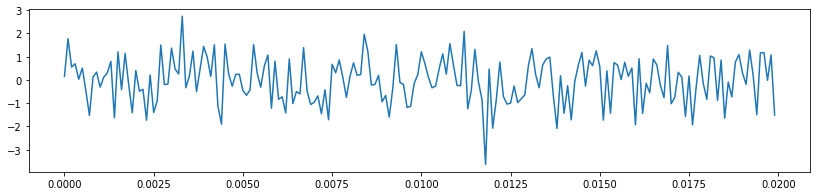

chunk shape:  200


In [4]:
T_window = 0.02 # these are now ms since the unit of choice are kHz
f_max = 5e3 # kHz
f, s, serr = spec.calc_spec(order_in=[2,3,4], T_window=T_window, f_max=f_max, backend='cpu')

The output will show you the actual length of a window (in case your T_window is not a multiple of 1/fs), the maximum frequency (Nyquist frequency) and the number of point of the calculated spectrum. The data point in the first window are plotted, so you can verify the window length (which is also given in points by chunk shape). The function will return `f` the frequencies at which the spectrum has been calculated, `s` the spectral values, and `serr` the error of the spectra value (1 sigma).

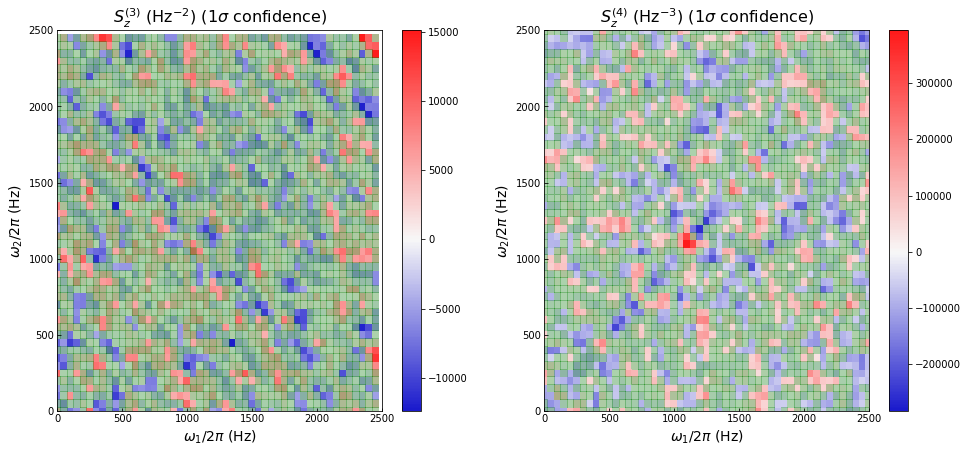

In [8]:
fig = spec.plot(order_in=[3,4], f_max=f_max/2)

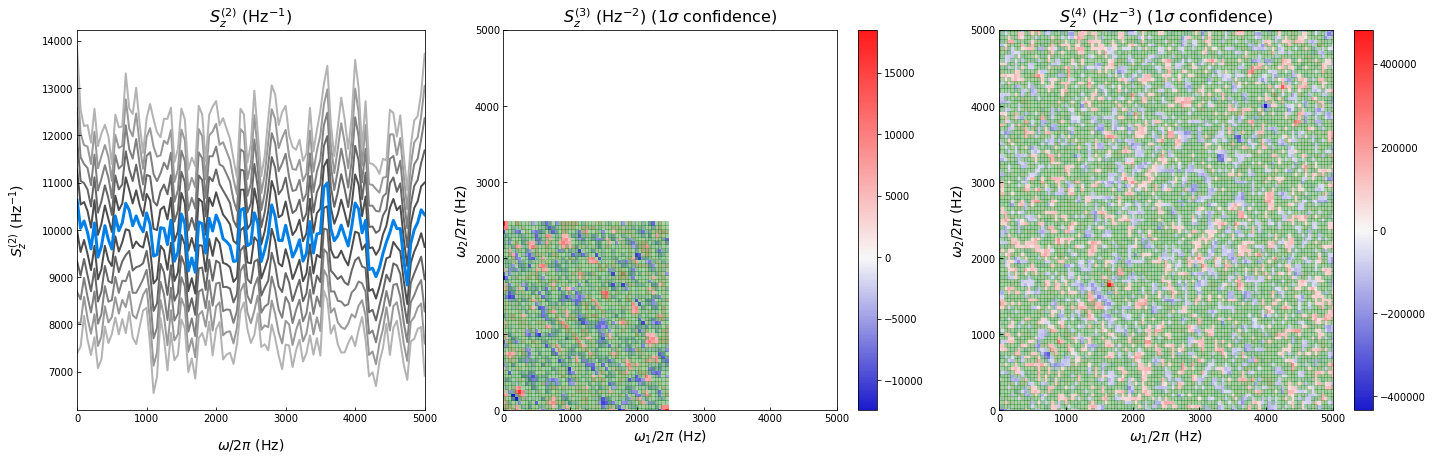

In [8]:
fig = spec.poly_plot(f_max=f_max)